## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)


In [96]:
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [97]:
mouse_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [98]:
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [99]:
study_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [100]:
# Combine the data into a single dataset
combined_analysis_df = study_results_df.merge(mouse_metadata_df, left_on='Mouse ID', right_on='Mouse ID')

# Display the data table for preview
combined_analysis_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [101]:
combined_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [102]:
# Checking the number of micecount
count_of_mice = combined_analysis_df['Mouse ID'].unique()
total_count_of_mice = len(count_of_mice)
total_count_of_mice

249

In [103]:
#intermediate .loc step
combined_analysis_df.duplicated(subset=['Mouse ID', 'Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [104]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_analysis_df.loc[combined_analysis_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [105]:
combined_analysis_df['Mouse ID'] == 'g989'

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [106]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data = combined_analysis_df.loc[combined_analysis_df['Mouse ID'] == 'g989']
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [107]:
duplicated_mice_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 860 to 872
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            13 non-null     object 
 1   Timepoint           13 non-null     int64  
 2   Tumor Volume (mm3)  13 non-null     float64
 3   Metastatic Sites    13 non-null     int64  
 4   Drug Regimen        13 non-null     object 
 5   Sex                 13 non-null     object 
 6   Age_months          13 non-null     int64  
 7   Weight (g)          13 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 936.0+ bytes


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_analysis_df.loc[combined_analysis_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [109]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [110]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = clean_df['Mouse ID'].unique()
total_mice_count_clean = len(mice_count_clean)
total_mice_count_clean

248

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [112]:
#Calculate the mean of the tumor volume for each regimen
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [113]:
#Calculate the median of the tumor volume for each regimen
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [114]:
#Calculate the variance of the tumor volume for each regimen
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [115]:
#Calculate the standard deviation of the tumor volume for each regimen
std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [116]:
#Calculate the SEM of the tumor volume for each regimen
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [117]:
# Summary statistical data of tumor volume of each regimen

regimen_stats = pd.DataFrame({"Mean":mean,
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": std_dev,
                              "SEM": sem})
regimen_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_stats_agg  = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
regimen_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [119]:
## Bar and Pie Charts

In [120]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_count = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

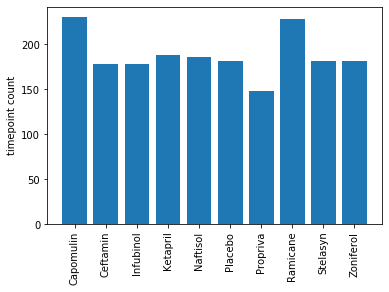

In [121]:
plt.bar(timepoint_count.index, timepoint_count)
plt.xticks(rotation=90)
plt.ylabel('timepoint count')
plt.show()

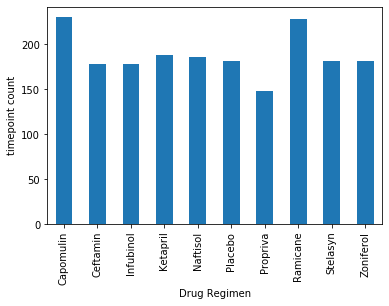

In [122]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.
timepoint_count.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('timepoint count')
plt.show()

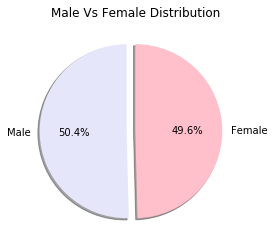

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group by gender and get a count
gender_df = clean_df.drop_duplicates(['Mouse ID'])['Sex'].value_counts()
gender_df

labels = ["Male", "Female"]
sizes = [125, 123]
colors = ["lavender", "pink"]
explode = (0.1, 0)

pie_plot_df= plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Male Vs Female Distribution");

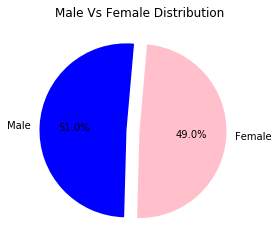

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df["Sex"].value_counts()
# chart variable
sex = gender.index
gender_count = gender.values
# formating
colors = ["blue", "pink"]
explode = [0.15, 0]

gender.plot(kind="pie", explode=explode, colors=colors, startangle=85, autopct="%1.1f%%")

plt.title("Male Vs Female Distribution")
plt.ylabel(" ")
plt.show()

## Quartiles, Outliers and Boxplots

In [146]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.sort_values(["Drug Regimen", "Mouse ID", 
                                      "Timepoint"])
max_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
971,w575,45,68.401286,3,Zoniferol,Female,16,28
972,x613,0,45.000000,0,Zoniferol,Female,2,29
973,x613,5,46.097041,0,Zoniferol,Female,2,29
974,x613,10,46.818176,0,Zoniferol,Female,2,29


In [148]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capmulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capmulin_df

capmulin_last = capmulin_df.groupby('Mouse ID').max()['Timepoint']
capmulin_vol = pd.DataFrame(capmulin_last)
capmulin_merge = pd.merge(capmulin_vol, clean_df, on=("Mouse ID", "Timepoint"))
capmulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [150]:
ramicane_df = combined_analysis_df.loc[combined_analysis_df['Drug Regimen'] == 'Ramicane']
ramicane_df
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_df, on=("Mouse ID", "Timepoint"))
ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [151]:
infubinol_df = combined_analysis_df.loc[combined_analysis_df['Drug Regimen'] == 'Infubinol']
infubinol_df
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_df, on=("Mouse ID", "Timepoint"))
infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [152]:
ceftamin_df = combined_analysis_df.loc[combined_analysis_df['Drug Regimen'] == 'Ceftamin']
ceftamin_df
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_df, on=("Mouse ID", "Timepoint"))
ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [155]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
capmulin_tumors = capmulin_merge["Tumor Volume (mm3)"]

quartiles =capmulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capmulin tumors: {lowerq}")
print(f"The upper quartile of Capmulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capmulin tumors: 32.37735684
The upper quartile of Capmulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [156]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [157]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [158]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


FileNotFoundError: [Errno 2] No such file or directory: '../Images/box_plot.png'

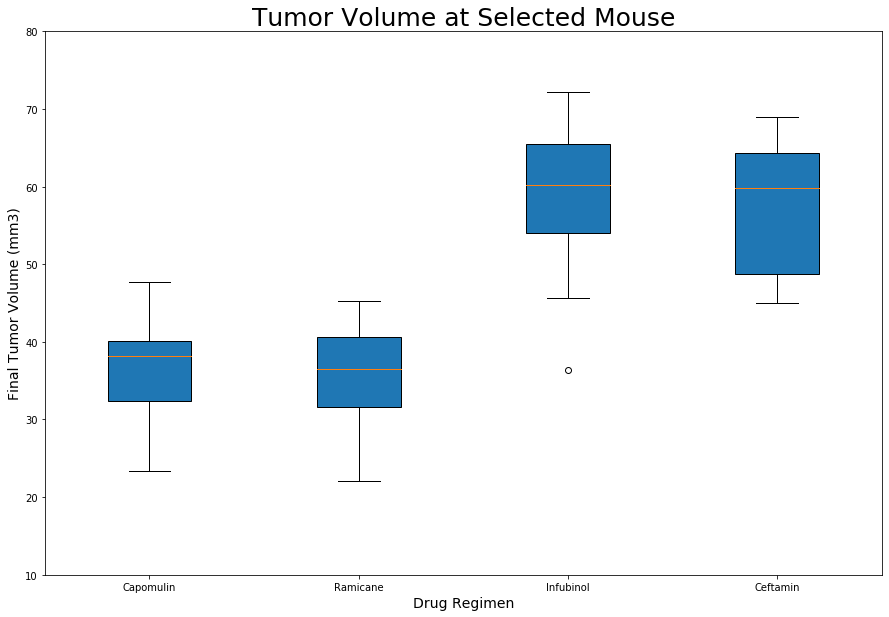

In [163]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [capmulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
